1. **Statistiques sur les salaires :**
   - Salaire moyen : Calculer le salaire moyen pour tous les postes.
   - Salaire minimum : Trouver le salaire minimum parmi tous les postes.
   - Salaire maximum : Trouver le salaire maximum parmi tous les postes.

2. **Répartition du niveau d'expérience :**
   - Pourcentage de postes d'entrée de gamme : Calculer le pourcentage de postes d'entrée de gamme par rapport aux autres niveaux d'expérience.
   - Pourcentage de postes de chaque niveau d'expérience : Calculer le pourcentage de postes pour chaque niveau d'expérience.

3. **Répartition du type de poste :**
   - Temps plein vs. Temps partiel : Déterminer la répartition des postes à temps plein et à temps partiel.

4. **Statistiques par pays :**
   - Nombre d'offres d'emploi : Compter le nombre d'offres d'emploi dans chaque pays.
   - Salaire moyen par pays : Calculer le salaire moyen pour chaque pays.

5. **Statistiques par entreprise :**
   - Nombre d'offres d'emploi par entreprise : Compter le nombre d'offres d'emploi pour chaque entreprise.
   - Salaire moyen par entreprise : Calculer le salaire moyen offert par chaque entreprise.
   
6. **Analyse des compétences et des exigences :**
   - Compétences les plus demandées : Identifier les compétences les plus fréquemment mentionnées dans les exigences d'emploi.

7. **Facilités offertes :**
   - Analyse des facilités : Compter le nombre de postes offrant des facilités spécifiques.


# 1. **Statistiques sur les salaires :**
   - Salaire moyen : Calculer le salaire moyen pour tous les postes.
   - Salaire minimum : Trouver le salaire minimum parmi tous les postes.
   - Salaire maximum : Trouver le salaire maximum parmi tous les postes.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud

# Chargement des données à partir du fichier CSV dans une DataFrame
df = pd.read_csv('./clean_data.csv', encoding='ISO-8859-1')

# Renommer la colonne "Requirment of the company" en "Requirment of the company" pour corriger la faute de frappe
df = df.rename(columns={"Requirment of the company ": "Requirment of the company"})

# Convertir la colonne "Requirment of the company" de la représentation de chaîne en liste réelle
df['Requirment of the company'] = df['Requirment of the company'].apply(ast.literal_eval)

# Convertir la colonne "Facilities" de la représentation de chaîne en liste réelle
df['Facilities'] = df['Facilities'].apply(ast.literal_eval)


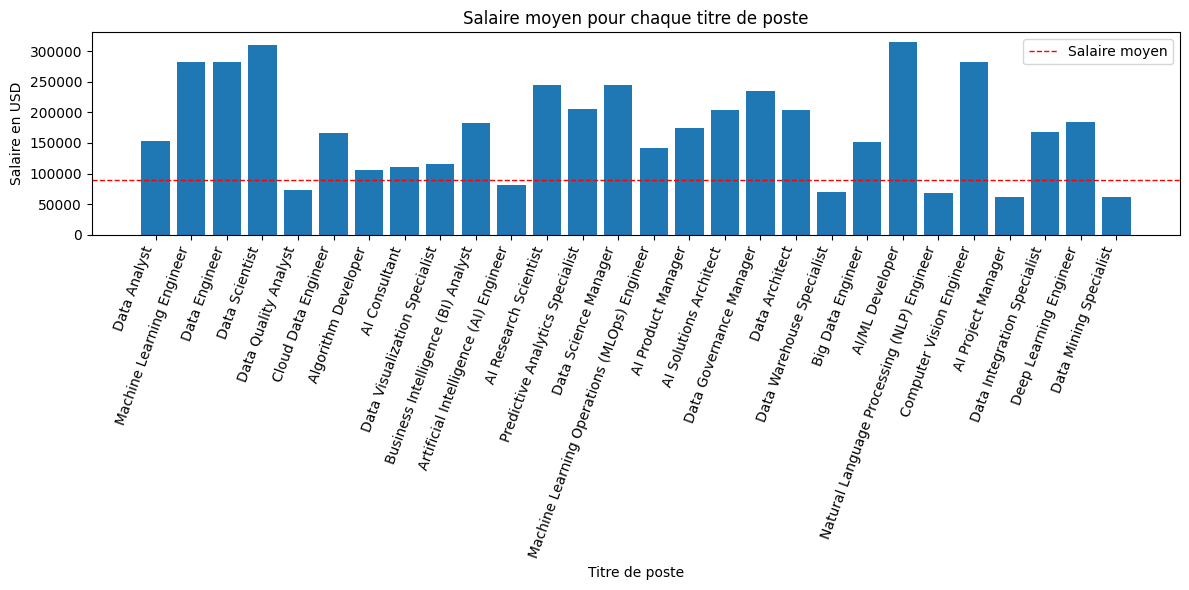

In [44]:
average_salary = df['Salary USD'].mean()
plt.figure(figsize=(12, 6))  
plt.bar(df['JobTitle'], df['Salary USD'])
plt.axhline(average_salary, color='red', linestyle='dashed', linewidth=1, label='Salaire moyen')
plt.xlabel('Titre de poste')
plt.ylabel('Salaire en USD')
plt.title('Salaire moyen pour chaque titre de poste')
plt.xticks(rotation=70, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.legend()  # Affichage de la légende
plt.tight_layout()  # Ajustement automatique des marges pour éviter le chevauchement des éléments
plt.show()  # Affichage du graphique

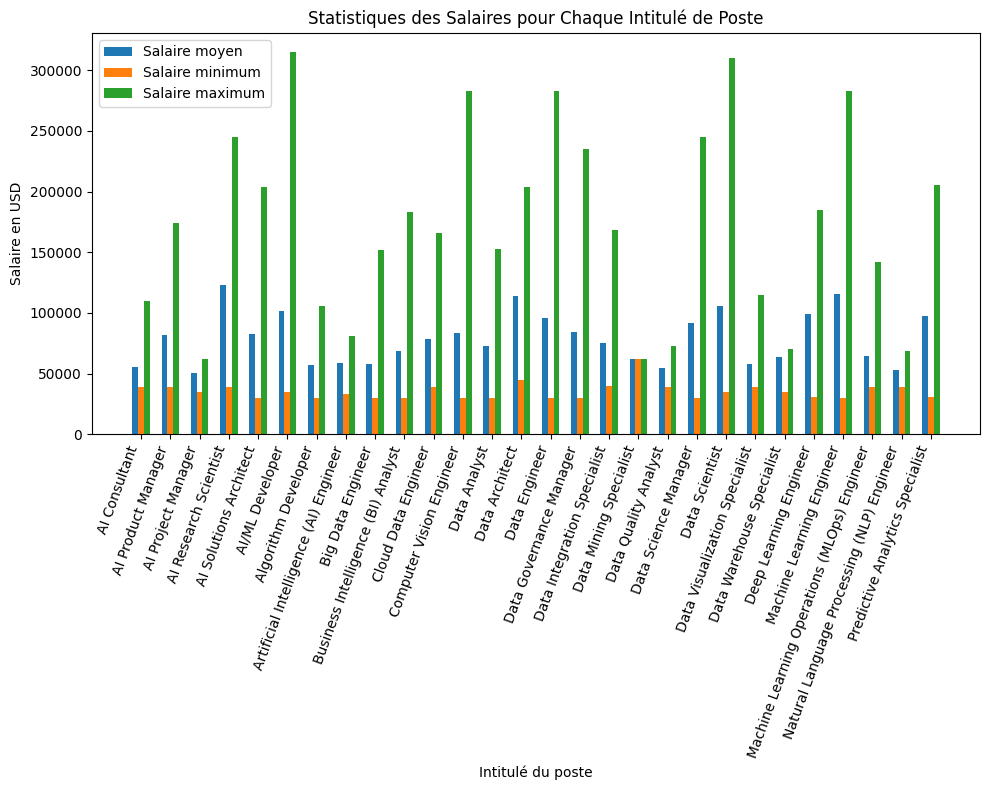

In [58]:
# Regrouper les données par 'JobTitle' et calculer les statistiques salariales (moyenne, minimum, maximum)
grouped_data = df.groupby('JobTitle')['Salary USD'].agg(['mean', 'min', 'max']).reset_index()

# Tracer le graphique à barres groupées
plt.figure(figsize=(10, 8))
largeur_barre = 0.2
index = range(len(grouped_data))

plt.bar(index, grouped_data['mean'], largeur_barre, label='Salaire moyen')
plt.bar([i + largeur_barre for i in index], grouped_data['min'], largeur_barre, label='Salaire minimum')
plt.bar([i + 2 * largeur_barre for i in index], grouped_data['max'], largeur_barre, label='Salaire maximum')

plt.xlabel('Intitulé du poste')
plt.ylabel('Salaire en USD')
plt.title('Statistiques des Salaires pour Chaque Intitulé de Poste')
plt.xticks([i + largeur_barre for i in index], grouped_data['JobTitle'], rotation=70, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# 2. **Répartition du niveau d'expérience :**
   - Pourcentage de postes d'entrée de gamme : Calculer le pourcentage de postes d'entrée de gamme par rapport aux autres niveaux d'expérience.
   - Pourcentage de postes de chaque niveau d'expérience : Calculer le pourcentage de postes pour chaque niveau d'expérience.

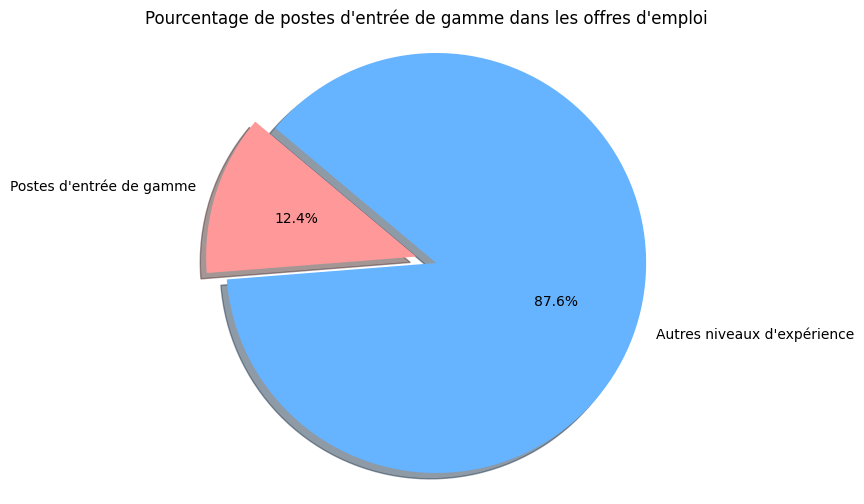

In [46]:
# Calcul du nombre de postes d'entrée de gamme
entry_level_count = df[df['Experience level'] == 'Entry-level'].shape[0]

# Calcul du nombre total de postes
total_positions = df.shape[0]

# Calcul du pourcentage de postes d'entrée de gamme
entry_level_percentage = (entry_level_count / total_positions) * 100

# Création du diagramme circulaire pour visualiser la répartition
labels = ['Postes d\'entrée de gamme', 'Autres niveaux d\'expérience']
sizes = [entry_level_percentage, 100 - entry_level_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Fait ressortir le premier secteur du diagramme

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Assure que le diagramme circulaire soit de forme circulaire.

plt.title('Pourcentage de postes d\'entrée de gamme dans les offres d\'emploi')
plt.show()


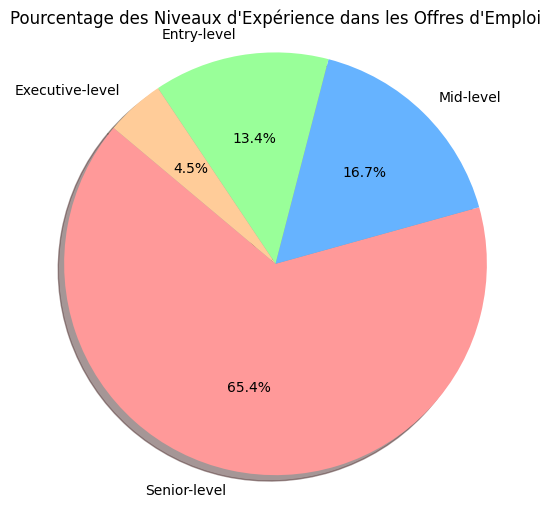

In [47]:
# Regroupement des données par 'Experience level' et calcul du nombre d'occurrences pour chaque groupe
experience_counts = df['Experience level'].value_counts()

# Création du diagramme circulaire pour visualiser la répartition
labels = experience_counts.index
sizes = experience_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Assure que le diagramme circulaire soit de forme circulaire.

plt.title('Pourcentage des Niveaux d\'Expérience dans les Offres d\'Emploi')
plt.show()


# 3. **Répartition du type de poste :**
   - Temps plein vs. Temps partiel : Déterminer la répartition des postes à temps plein et à temps partiel.

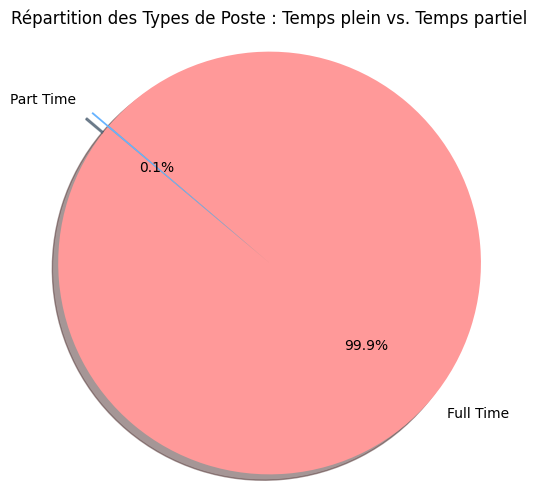

In [48]:
# Calcul du nombre d'offres d'emploi pour chaque type de poste
job_type_counts = df['Job Type'].value_counts()

# Création du diagramme circulaire pour visualiser la répartition
labels = job_type_counts.index
sizes = job_type_counts.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Fait ressortir le premier secteur (Full Time)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Assure que le diagramme circulaire soit de forme circulaire.

plt.title('Répartition des Types de Poste : Temps plein vs. Temps partiel')
plt.show()


# 4. **Statistiques par pays :**
   - Nombre d'offres d'emploi : Compter le nombre d'offres d'emploi dans chaque pays.
   - Salaire moyen par pays : Calculer le salaire moyen pour chaque pays.

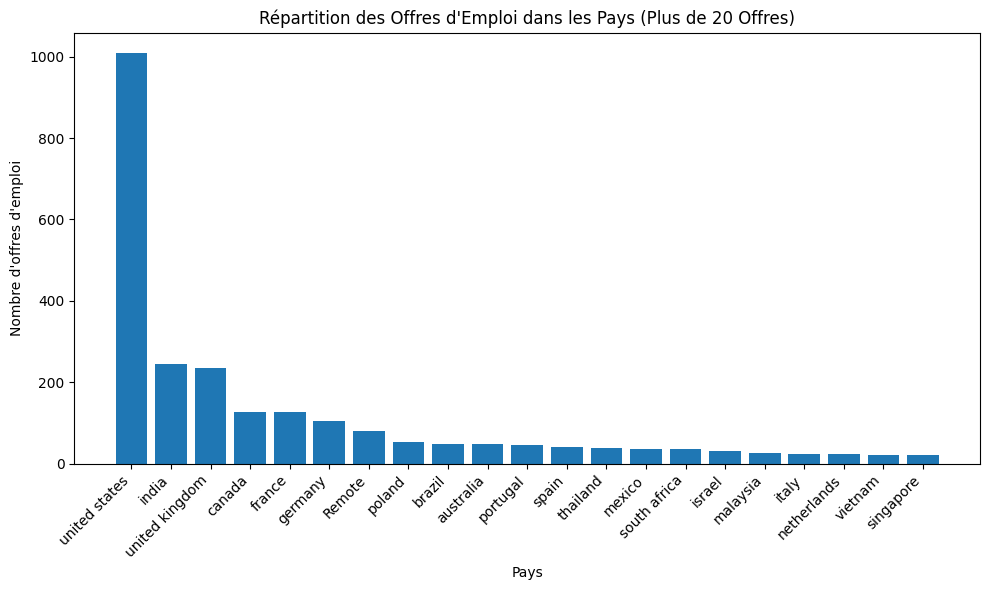

In [59]:
# Comptage du nombre d'offres d'emploi dans chaque pays
job_openings_by_country = df['Country'].value_counts()

# Filtrage des pays où le nombre d'offres d'emploi est supérieur à 20
job_openings_greater_than_20 = job_openings_by_country[job_openings_by_country > 20]

# Création du graphique à barres pour visualiser la distribution
plt.figure(figsize=(10, 6))
plt.bar(job_openings_greater_than_20.index, job_openings_greater_than_20.values)
plt.xlabel('Pays')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.title("Répartition des Offres d'Emploi dans les Pays (Plus de 20 Offres)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


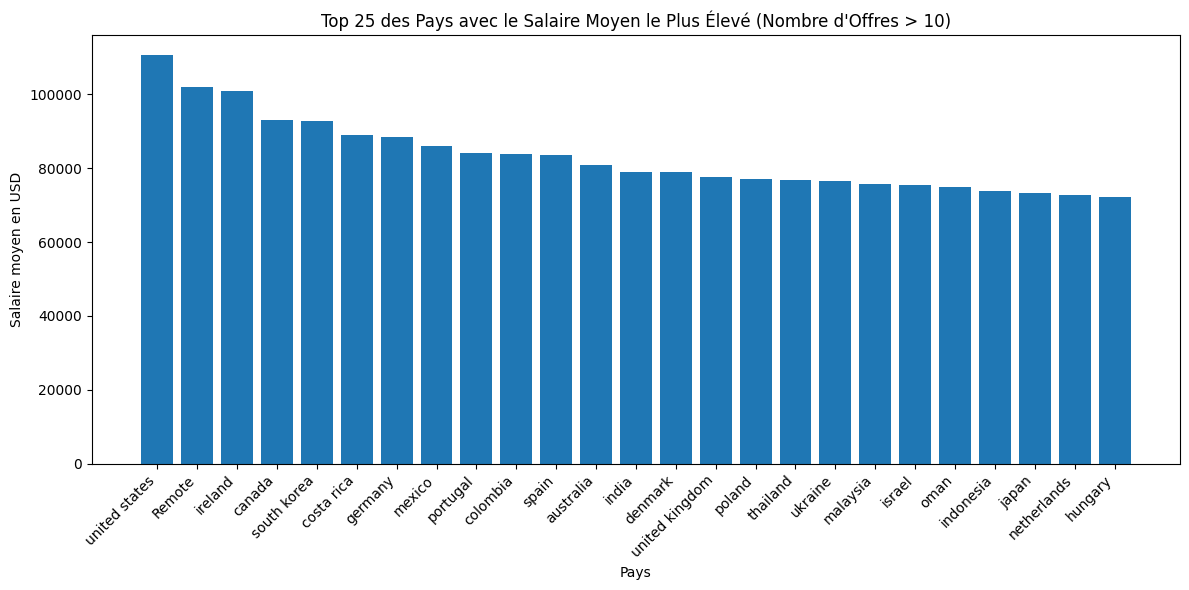

In [60]:
# Filtrage des données en supprimant les pays contenant "not found" dans le nom ('Country')
filtered_df = df[~df['Country'].str.contains('not found', case=False)]

# Calcul du nombre d'offres d'emploi pour chaque pays
country_counts = filtered_df['Country'].value_counts()

# Filtrage des pays avec un nombre d'offres d'emploi supérieur à 10
filtered_countries = country_counts[country_counts > 10].index

# Filtrage du DataFrame pour conserver uniquement les lignes des pays filtrés
filtered_df = filtered_df[filtered_df['Country'].isin(filtered_countries)]

# Calcul du salaire moyen pour chaque pays
average_salary_by_country = filtered_df.groupby('Country')['Salary USD'].mean().reset_index()

# Tri du DataFrame par salaire moyen en ordre décroissant et sélection des 25 premiers pays
top_25_countries = average_salary_by_country.nlargest(25, 'Salary USD')

# Création du graphique à barres pour visualiser les 25 pays avec le salaire moyen le plus élevé
plt.figure(figsize=(12, 6))
plt.bar(top_25_countries['Country'], top_25_countries['Salary USD'])
plt.xlabel('Pays')
plt.ylabel('Salaire moyen en USD')
plt.title('Top 25 des Pays avec le Salaire Moyen le Plus Élevé (Nombre d\'Offres > 10)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# 5. **Statistiques par entreprise :**
   - Nombre d'offres d'emploi par entreprise : Compter le nombre d'offres d'emploi pour chaque entreprise.
   - Salaire moyen par entreprise : Calculer le salaire moyen offert par chaque entreprise.

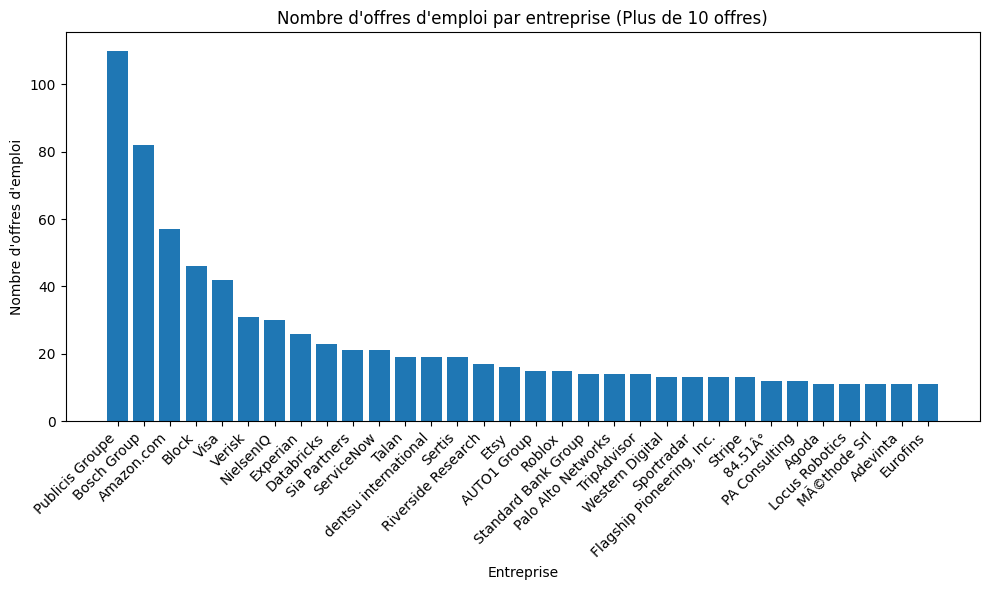

In [51]:
# Filtrage des données en supprimant les pays contenant "not found" dans le nom ('Country')
filtered_df = df[~df['Country'].str.contains('not found', case=False)]

# Calcul du nombre d'offres d'emploi pour chaque entreprise
job_openings_per_company = filtered_df['Company'].value_counts()

# Filtrage des entreprises ayant plus de 10 offres d'emploi
companies_with_more_than_20_jobs = job_openings_per_company[job_openings_per_company > 10]

# Filtrage du DataFrame pour conserver uniquement les lignes des entreprises ayant plus de 10 offres d'emploi
filtered_df = filtered_df[filtered_df['Company'].isin(companies_with_more_than_20_jobs.index)]

# Création du graphique à barres pour visualiser le nombre d'offres d'emploi par entreprise (pour les entreprises ayant plus de 10 offres d'emploi)
plt.figure(figsize=(10, 6))
plt.bar(companies_with_more_than_20_jobs.index, companies_with_more_than_20_jobs.values)
plt.xlabel('Entreprise')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.title('Nombre d\'offres d\'emploi par entreprise (Plus de 10 offres)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

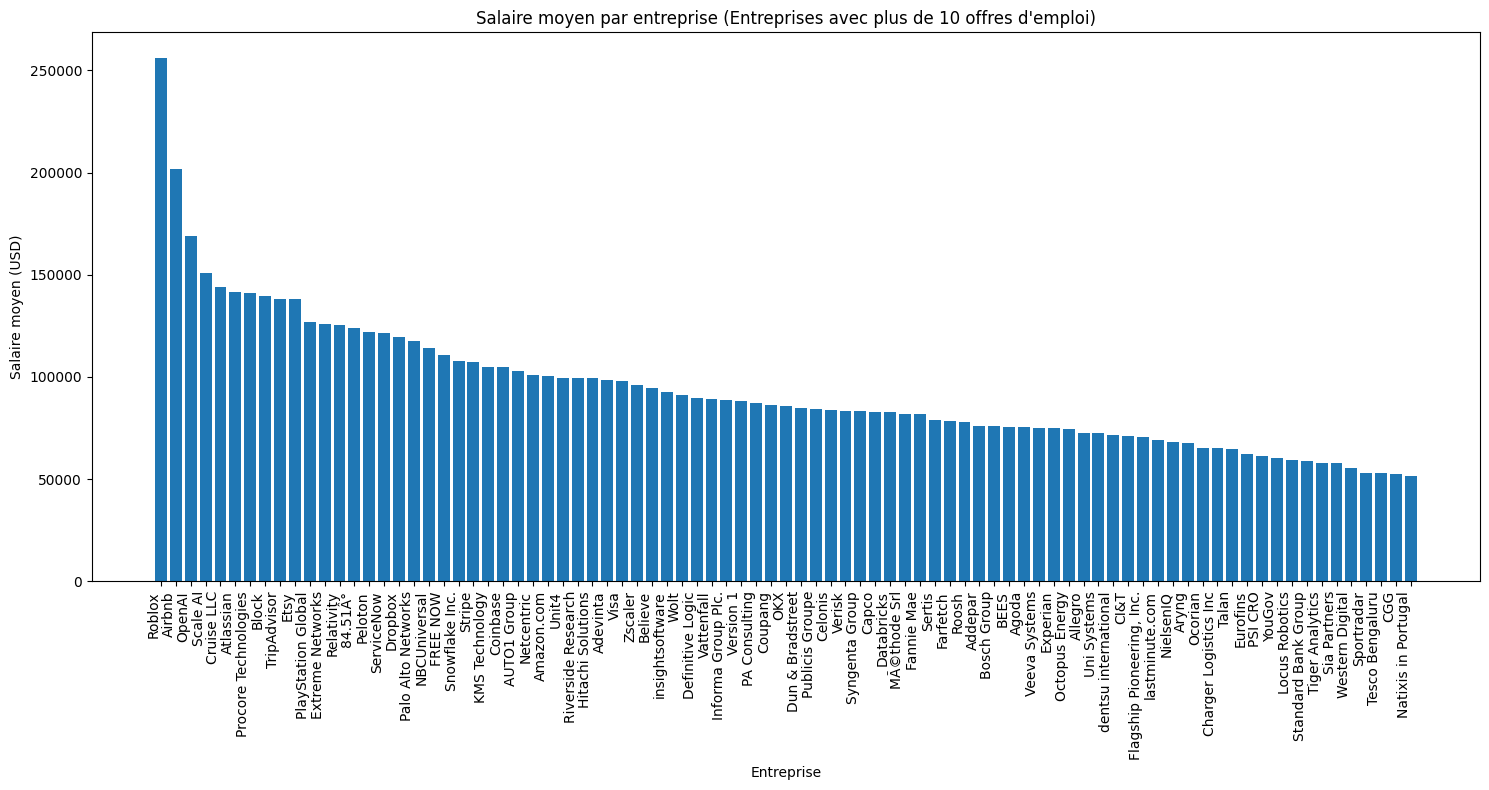

In [52]:
# Filtrage des données en supprimant les pays contenant "not found" dans le nom ('Country')
filtered_df = df[~df['Country'].str.contains('not found', case=False)]

# Calcul du nombre d'offres d'emploi par entreprise
job_openings_per_company = filtered_df['Company'].value_counts()

# Filtrage des entreprises ayant plus de 5 offres d'emploi
companies_with_more_than_10_jobs = job_openings_per_company[job_openings_per_company > 5].index

# Filtrage du DataFrame pour conserver uniquement les lignes des entreprises ayant plus de 5 offres d'emploi
filtered_df = filtered_df[filtered_df['Company'].isin(companies_with_more_than_10_jobs)]

# Calcul du salaire moyen offert par chaque entreprise
average_salary_per_company = filtered_df.groupby('Company')['Salary USD'].mean().reset_index()

# Tri du DataFrame par salaire moyen en ordre décroissant
average_salary_per_company = average_salary_per_company.sort_values(by='Salary USD', ascending=False)

# Création du graphique à barres pour visualiser le salaire moyen par entreprise
plt.figure(figsize=(15, 8))
plt.bar(average_salary_per_company['Company'], average_salary_per_company['Salary USD'])
plt.xlabel('Entreprise')
plt.ylabel('Salaire moyen (USD)')
plt.title('Salaire moyen par entreprise (Entreprises avec plus de 10 offres d\'emploi)')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


# 6. **Analyse des compétences et des exigences :**
   - Compétences les plus demandées : Identifier les compétences les plus fréquemment mentionnées dans les exigences d'emploi.
   - Fréquence des compétences : Analyser la fréquence des différentes compétences demandées par les entreprises.

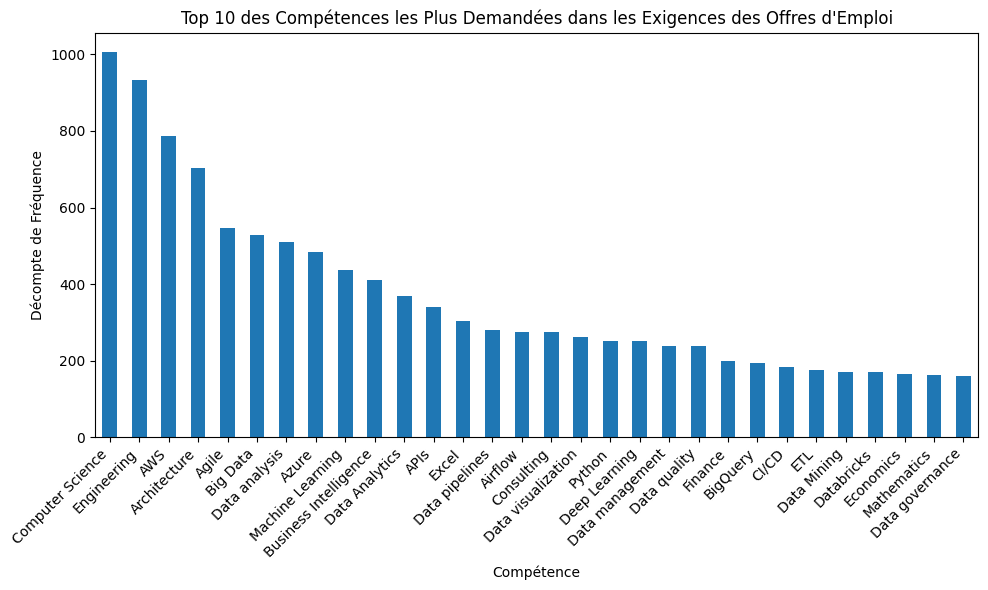

In [53]:
# Filtrage des données en supprimant les pays contenant "not found" dans le nom ('Country')
filtered_df = df[~df['Country'].str.contains('not found', case=False)]

# Combinaison des listes de compétences dans la colonne 'Requirment of the company' en une seule liste
all_skills = []
for skills_list in filtered_df['Requirment of the company']:
    all_skills.extend(skills_list)

# Comptage des occurrences de chaque compétence
skills_count = pd.Series(all_skills).value_counts()

# Obtenir les 10 compétences les plus demandées
top_skills = skills_count.nlargest(30)

# Création du graphique à barres pour visualiser les compétences les plus demandées
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.xlabel('Compétence')
plt.ylabel('Décompte de Fréquence')
plt.title('Top 10 des Compétences les Plus Demandées dans les Exigences des Offres d\'Emploi')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [54]:
# Filtrage des données en supprimant les pays contenant "not found" dans le nom ('Country')
filtered_df = df[~df['Country'].str.contains('not found', case=False)]
filtered_df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,Salary USD,Country,JobTitle
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"[Computer Science, Data quality, Genetics, Mat...",[],48000.0,united states,Data Analyst
1,Ocorian,AML/CFT & Data Analyst,"EbÃ¨ne, Mauritius",Full Time,Entry-level,48K+ *,"[Agile, Data management, Finance, Security]",[],48000.0,mauritius,Data Analyst
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"[Agile, Architecture, AWS, Computer Science, C...",[Career development],90000.0,united states,Machine Learning Engineer
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"[Engineering, Industrial, Oracle, Power BI, R,...",[],48000.0,italy,Data Analyst
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"[AWS, Azure, Computer Science, Consulting, Dat...","[Flex hours, Flex vacation, Parental leave, Un...",108000.0,united states,Data Engineer
...,...,...,...,...,...,...,...,...,...,...,...
2819,CCRi,"Application Integration Engineer, Computer Vis...","Chantilly, Virginia, United States",Full Time,Mid-level,113K+,"[Agile, Angular, APIs, Architecture, AWS, Azure]","[401(k) matching, Career development, Flex hou...",113000.0,united states,Computer Vision Engineer
2820,Publicis Groupe,"Associate Director, Data Science","New York City, United States",Full Time,Mid-level,106K+,"[Bayesian, Classification, Clustering, Data an...","[Career development, Health care]",106000.0,united states,Data Science Manager
2821,DoorDash,"Senior Software Engineer, Machine Learning - A...","Sunnyvale, CA; San Francisco, CA; New York Â",Full Time,Senior-level,176K+,"[Computer Science, Data analysis, Engineering,...","[401(k) matching, Career development, Equity, ...",176000.0,united states,Machine Learning Engineer
2822,Western Digital,Data Scientist - New College Graduate,"BiÃ±an, Philippines",Full Time,Entry-level,39K+ *,"[APIs, Clustering, Computer Science, Data visu...",[Career development],39000.0,philippines,Data Scientist


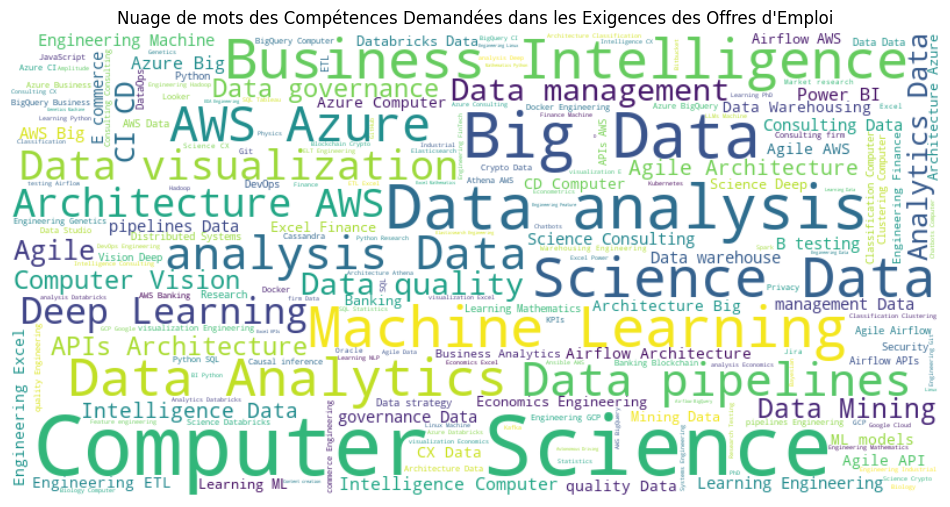

In [55]:
# Combinaison des listes de compétences dans la colonne 'Requirment of the company' en une seule liste
all_skills = []
for skills_list in filtered_df['Requirment of the company']:
    all_skills.extend(skills_list)

# Création d'un texte à partir des compétences pour le nuage de mots
skills_text = ' '.join(all_skills)

# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Affichage du nuage de mots
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des Compétences Demandées dans les Exigences des Offres d\'Emploi')
plt.show()

# 7. **Facilités offertes :**
   - Analyse des facilités : Compter le nombre de postes offrant des facilités spécifiques.

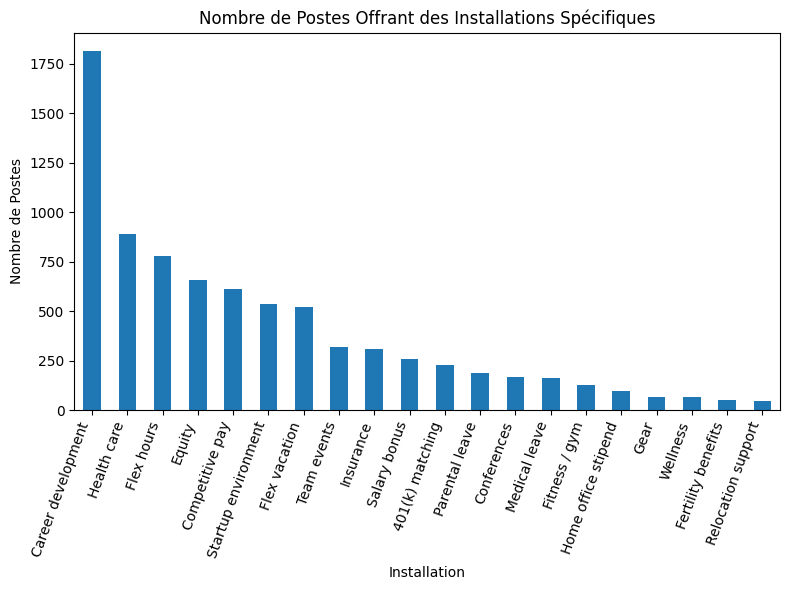

In [56]:
# Combinaison des listes d'installations dans la colonne 'Facilities' en une seule liste
all_facilities = []
for facilities_list in df['Facilities']:
    all_facilities.extend(facilities_list)

# Comptage des occurrences de chaque installation dans la liste combinée et sélection des 20 installations les plus fréquentes
facilities_count = pd.Series(all_facilities).value_counts().nlargest(20)

# Création du graphique à barres pour visualiser le nombre de postes offrant des installations spécifiques
plt.figure(figsize=(8, 6))
facilities_count.plot(kind='bar')
plt.xlabel('Installation')
plt.ylabel('Nombre de Postes')
plt.title('Nombre de Postes Offrant des Installations Spécifiques')
plt.xticks(rotation=70, ha='right')

plt.tight_layout()
plt.show()


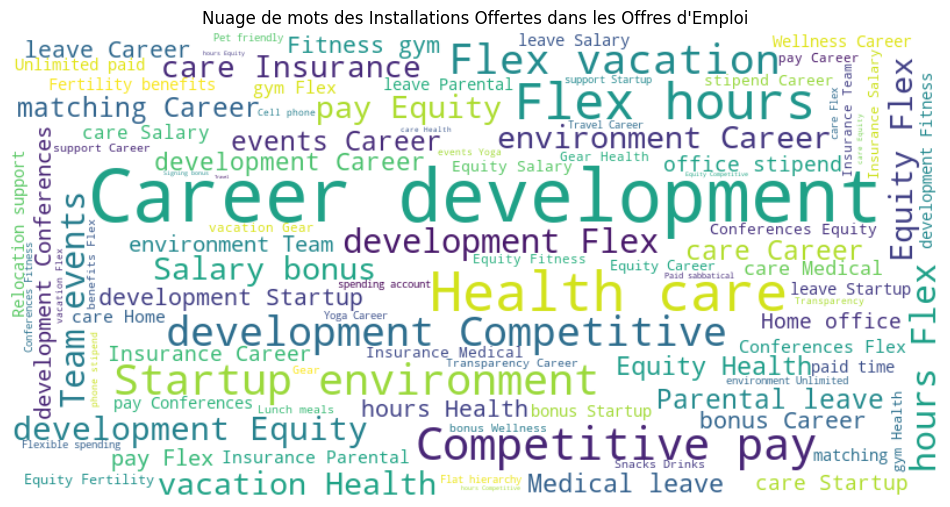

In [57]:
# Combinaison des listes d'installations dans la colonne 'Facilities' en une seule liste
all_facilities = []
for facilities_list in df['Facilities']:
    all_facilities.extend(facilities_list)

# Création d'un texte à partir des installations pour le nuage de mots
facilities_text = ' '.join(all_facilities)

# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(facilities_text)

# Affichage du nuage de mots
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des Installations Offertes dans les Offres d\'Emploi')
plt.show()